<a href="https://colab.research.google.com/github/pngy87/-PTDLNC-GOOGLE-COLAB/blob/main/%5BCHAPTER%208.3%5D%20Prediction_%26_Clustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction & Classification Review


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
#download data from google drive
import gdown
url = "https://drive.google.com/uc?id=141SeH5J7gcihGagp-kHBet0y-l6Mz3RZ"


gdown.download(url, "online_retail_II.xlsx", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=141SeH5J7gcihGagp-kHBet0y-l6Mz3RZ
To: /content/online_retail_II.xlsx
100%|██████████| 45.6M/45.6M [00:00<00:00, 56.3MB/s]


'online_retail_II.xlsx'

In [ ]:
# Load Online Retail II Dataset efficiently
file_path = "online_retail_II.xlsx"
sheet_names = ["Year 2009-2010", "Year 2010-2011"]

# Load both sheets and concatenate
all_dfs = [pd.read_excel(file_path, sheet_name=sheet, dtype={"Invoice": str, "StockCode": str}) for sheet in sheet_names]
df_raw = pd.concat(all_dfs, ignore_index=True)

#1. Identify Data Quality and distribution

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(df_raw.describe())


Summary Statistics:
           Quantity                    InvoiceDate     UnitPrice  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450  



Missing Values:
Description      4382
Customer ID    243007
dtype: int64

Number of Duplicate Rows: 34335


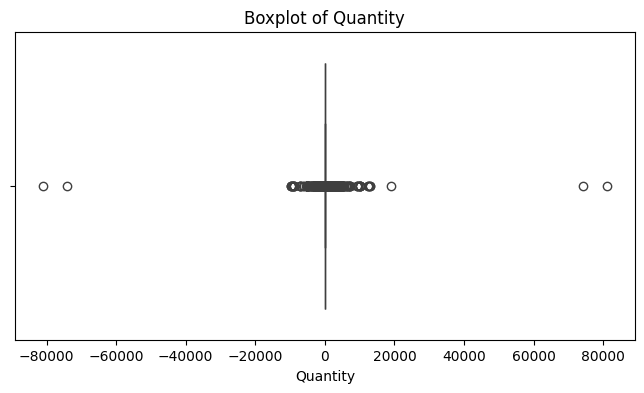

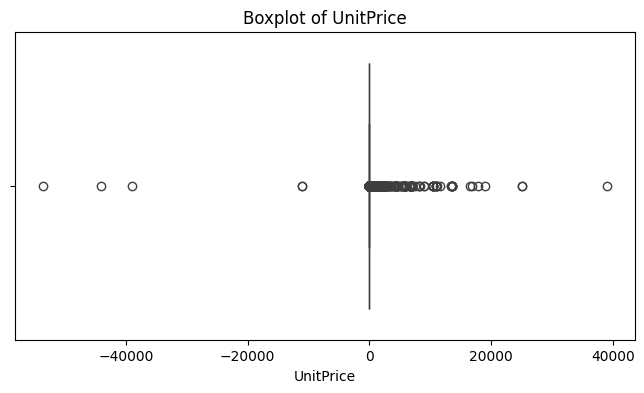

In [ ]:
# Check for missing values
missing_values = df_raw.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


# Check for duplicate rows
duplicates = df_raw.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# Check for outliers in numerical columns using boxplots
numerical_columns = ['Quantity', 'UnitPrice']  # Modify based on dataset
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_raw[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# Data Cleaning
# Remove rows with missing Customer IDs
df = df_raw.dropna(subset=['Customer ID'])
# Remove rows with negative or zero Quantity and Price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['UnitPrice'] <20000) & (df['Quantity'] <20000)]

# Display the cleaned dataset after removing duplicates
df = df.drop_duplicates()

df=df.copy()
# Compute Total Spend
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(df.describe())


            Quantity                    InvoiceDate      UnitPrice  \
count  779423.000000                         779423  779423.000000   
mean       13.290270  2011-01-03 01:44:03.168420608       3.218492   
min         1.000000            2009-12-01 07:45:00       0.001000   
25%         2.000000            2010-07-02 14:39:00       1.250000   
50%         6.000000            2010-12-02 14:09:00       1.950000   
75%        12.000000            2011-08-01 13:44:00       3.750000   
max     19152.000000            2011-12-09 12:50:00   10953.500000   
std        76.131234                            NaN      29.676178   

         Customer ID     TotalSpend  
count  779423.000000  779423.000000  
mean    15320.362833      21.976707  
min     12346.000000       0.001000  
25%     13971.000000       4.950000  
50%     15247.000000      12.480000  
75%     16794.000000      19.800000  
max     18287.000000   38970.000000  
std      1695.691125      87.634176  


In [ ]:
# Define the analysis date (One day after the last transaction)
analysis_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

# Compute RFM features
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (Unique purchases)
    'TotalSpend': 'sum'  # Monetary Value
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display summary of RFM values
print("\nRFM Summary:")
print(rfm.head())
print(rfm.describe())



RFM Summary:
             Recency  Frequency  Monetary
Customer ID                              
12346.0          529         11    372.86
12347.0            2          8   4921.53
12348.0           75          5   2019.40
12349.0           19          4   4428.69
12350.0          310          1    334.40
           Recency    Frequency       Monetary
count  5878.000000  5878.000000    5878.000000
mean    201.401327     6.289044    2914.112125
std     209.359711    13.009400   14245.372132
min       1.000000     1.000000       2.900000
25%      26.000000     1.000000     342.225000
50%      96.000000     3.000000     865.400000
75%     380.000000     7.000000    2247.170000
max     739.000000   398.000000  580987.040000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the RFM values
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm.columns, index=rfm.index)

print("\nNormalized RFM data (first few rows):")
print(rfm_scaled.head())



Normalized RFM data (first few rows):
              Recency  Frequency  Monetary
Customer ID                               
12346.0      0.715447   0.025189  0.000637
12347.0      0.001355   0.017632  0.008466
12348.0      0.100271   0.010076  0.003471
12349.0      0.024390   0.007557  0.007618
12350.0      0.418699   0.000000  0.000571


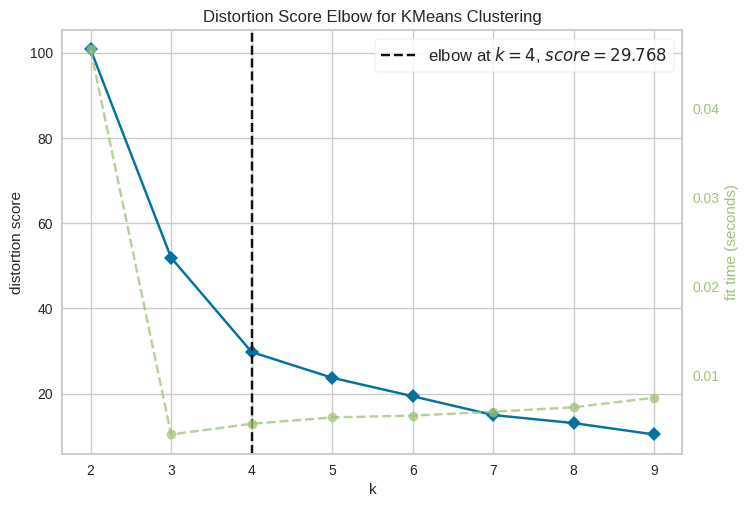


Optimal number of clusters: 4


In [ ]:
# Use Elbow Method to find optimal K
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(rfm_scaled)
visualizer.show()

# Get the optimal number of clusters
optimal_k = visualizer.elbow_value_
print("\nOptimal number of clusters:", optimal_k)


In [ ]:
# Apply K-Means clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the first few cluster assignments
print("\nRFM Data with Cluster Assignments:")
print(rfm.head())



RFM Data with Cluster Assignments:
             Recency  Frequency  Monetary  Cluster
Customer ID                                       
12346.0          529         11    372.86        3
12347.0            2          8   4921.53        1
12348.0           75          5   2019.40        1
12349.0           19          4   4428.69        1
12350.0          310          1    334.40        0


In [ ]:
# Cluster size distribution
print("\nCluster Size Distribution:")
print(rfm['Cluster'].value_counts())

# Compute mean RFM values for each cluster
cluster_summary = rfm.groupby('Cluster').mean()
print("\nCluster Summary Statistics:")
print(cluster_summary)



Cluster Size Distribution:
Cluster
1    3145
2    1106
0     989
3     638
Name: count, dtype: int64

Cluster Summary Statistics:
            Recency  Frequency     Monetary
Cluster                                    
0        213.390293   3.706775  1377.327609
1         37.933863   9.315739  4561.691784
2        412.929476   2.716094   928.803364
3        621.931034   1.565831   616.296053


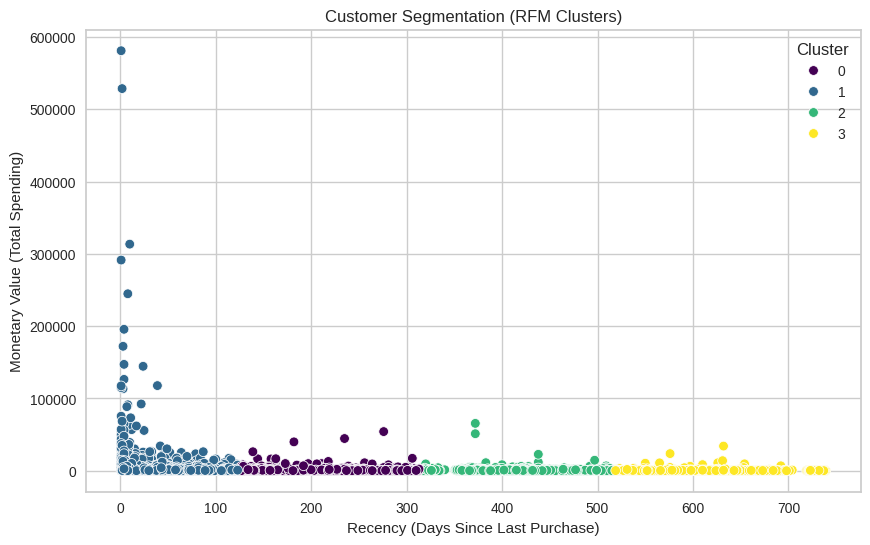

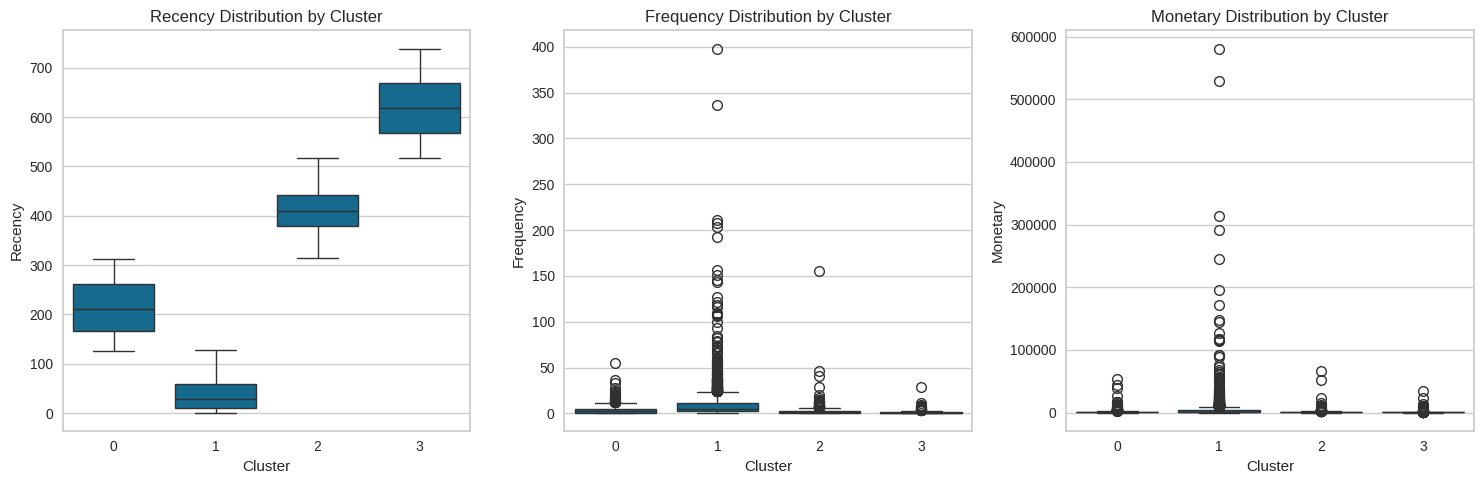

In [ ]:
# Scatter plot of clusters (Recency vs Monetary)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='viridis')
plt.title("Customer Segmentation (RFM Clusters)")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Monetary Value (Total Spending)")
plt.show()

# Box plots of RFM features for each cluster
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=rfm['Cluster'], y=rfm['Recency'], ax=axes[0])
axes[0].set_title("Recency Distribution by Cluster")

sns.boxplot(x=rfm['Cluster'], y=rfm['Frequency'], ax=axes[1])
axes[1].set_title("Frequency Distribution by Cluster")

sns.boxplot(x=rfm['Cluster'], y=rfm['Monetary'], ax=axes[2])
axes[2].set_title("Monetary Distribution by Cluster")

plt.tight_layout()
plt.show()


In [ ]:
# Business Interpretation
segment_labels = {
    0: "Loyal Customers (High Frequency, High Monetary)",
    1: "Big Spenders (High Monetary, Low Recency)",
    2: "Recent Customers (Low Recency, Low Frequency)",
    3: "Inactive Customers (High Recency, Low Monetary)"
}

rfm['Segment'] = rfm['Cluster'].map(segment_labels)

# Display segment counts
print("\nCustomer Segments:")
print(rfm['Segment'].value_counts())

# Save segmented customers
rfm.to_csv("customer_segments.csv")
print("\nSegmented customer data saved to 'customer_segments.csv'.")



Customer Segments:
Segment
Big Spenders (High Monetary, Low Recency)          3145
Recent Customers (Low Recency, Low Frequency)      1106
Loyal Customers (High Frequency, High Monetary)     989
Inactive Customers (High Recency, Low Monetary)     638
Name: count, dtype: int64

Segmented customer data saved to 'customer_segments.csv'.


# PART 2: churn  prediction

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Customer ID,Country,TotalSpend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
# Define the last transaction date
max_date = df['InvoiceDate'].max()

# Define cutoff dates
churn_check_date = max_date - pd.DateOffset(months=3)  # Last 3 months for churn labeling
rfm_cutoff_date = churn_check_date  # Remove last 3 months for RFM computation

# Split data:
df_rfm = df[df['InvoiceDate'] < rfm_cutoff_date]  # Data used for feature extraction
df_churn = df[df['InvoiceDate'] >= churn_check_date]  # Data used for defining churn label

print("Last transaction date:", max_date)
print("RFM data cutoff date:", rfm_cutoff_date)
print("Churn label period starts from:", churn_check_date)



Last transaction date: 2011-12-09 12:50:00
RFM data cutoff date: 2011-09-09 12:50:00
Churn label period starts from: 2011-09-09 12:50:00


In [ ]:
# Define reference date as the day after RFM data
analysis_date = df_rfm['InvoiceDate'].max() + pd.DateOffset(days=1)

# Compute RFM features
rfm = df_rfm.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSpend': 'sum',  # Monetary
    'Quantity': 'sum'  # Total items purchased
})

rfm.columns = ['Recency', 'Frequency', 'TotalSpend', 'Total_Items']

# Remove customers with zero frequency
rfm = rfm[rfm['Frequency'] > 0]

# Compute Average Order Value safely
rfm['Avg_Order_Value'] = rfm['TotalSpend'] / rfm['Frequency']

# Replace infinite or NaN values with 0
rfm.replace([np.inf, -np.inf], 0, inplace=True)
rfm.fillna(0, inplace=True)

print("\nRFM Summary After Cleaning:")
print(rfm.describe())




RFM Summary After Cleaning:
           Recency    Frequency     TotalSpend    Total_Items  Avg_Order_Value
count  5279.000000  5279.000000    5279.000000    5279.000000      5279.000000
mean    207.766622     5.742375    2621.539958    1606.096041       368.107173
std     174.803652    11.459152   12182.481365    7985.490490       531.638739
min       1.000000     1.000000       2.900000       1.000000         2.900000
25%      50.000000     1.000000     318.290000     167.000000       174.689000
50%     164.000000     3.000000     782.950000     438.000000       276.682500
75%     326.000000     6.000000    2075.570000    1197.500000       409.758750
max     648.000000   309.000000  456780.490000  298022.000000     14844.766667


In [ ]:
# Find customers who made at least one purchase in the last 3 months
active_customers = df_churn['Customer ID'].unique()

# Assign churn label: 1 (Churned) if customer is NOT in the last 3 months data
rfm['Churn'] = (~rfm.index.isin(active_customers)).astype(int)

# Print churn statistics
print("\nChurn Label Distribution:")
print(rfm['Churn'].value_counts())



Churn Label Distribution:
Churn
1    2986
0    2293
Name: count, dtype: int64


In [ ]:
rfm

,Recency,Frequency,TotalSpend,Total_Items,Avg_Order_Value,Churn
Customer ID,,,,,,
12346.0,438,11,372.86,70,33.896364,1
12347.0,39,6,3402.39,2099,567.065000,0
12348.0,158,4,1709.40,2497,427.350000,0
12349.0,317,3,2671.14,993,890.380000,0
12350.0,219,1,334.40,197,334.400000,1
...,...,...,...,...,...,...
18283.0,5,16,1706.20,1041,106.637500,0
18284.0,341,1,461.68,494,461.680000,1
18285.0,570,1,427.00,145,427.000000,1


In [ ]:
from sklearn.model_selection import train_test_split
# Define features and target variable
X = rfm.drop(columns=['Churn'])  # Features
y = rfm['Churn']  # Target variable

# Normalize the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Print train-test distribution
print("\nTrain-Test Distribution:")
print("Train set churn distribution:\n", y_train.value_counts())
print("Test set churn distribution:\n", y_test.value_counts())



Train-Test Distribution:
Train set churn distribution:
 Churn
1    2090
0    1605
Name: count, dtype: int64
Test set churn distribution:
 Churn
1    896
0    688
Name: count, dtype: int64


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")



Model Evaluation Metrics:
Accuracy: 0.71
Precision: 0.73
Recall: 0.78
F1-score: 0.75



Model Evaluation Metrics with Adjusted Threshold:
Accuracy: 0.70
Precision: 0.72
Recall: 0.78
F1-score: 0.75


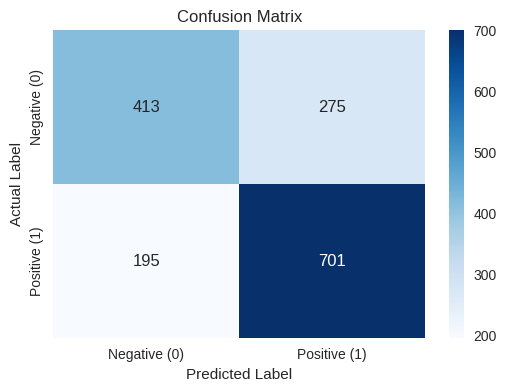

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get probabilities instead of class predictions
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability for class 1

# Adjust cutoff threshold (Increase for higher precision, decrease for higher recall)
threshold = 0.5  # Experiment with values like 0.6, 0.7, 0.8
y_pred_adjusted = (y_prob >= threshold).astype(int)  # Apply threshold

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print metrics
print("\nModel Evaluation Metrics with Adjusted Threshold:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Visualize confusion matrix
labels = ["Negative (0)", "Positive (1)"]
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()



# Prediction implementation

In [ ]:
# Define reference date as the day after RFM data
analysis_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

# Compute RFM features
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSpend': 'sum',  # Monetary
    'Quantity': 'sum'  # Total items purchased,
})
rfm.columns = ['Recency', 'Frequency', 'TotalSpend', 'Total_Items']
# Compute Average Order Value safely
rfm['Avg_Order_Value'] = rfm['TotalSpend'] / rfm['Frequency']

# Replace infinite or NaN values with 0
rfm.replace([np.inf, -np.inf], 0, inplace=True)
rfm.fillna(0, inplace=True)
print("\nRFM Summary After Cleaning:")
print(rfm.describe())

# Normalize the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(rfm)



RFM Summary After Cleaning:
           Recency    Frequency     TotalSpend    Total_Items  Avg_Order_Value
count  5878.000000  5878.000000    5878.000000    5878.000000      5878.000000
mean    201.401327     6.289044    2914.112125    1762.290235       369.756804
std     209.359711    13.009400   14245.372132    8765.111023       521.205290
min       1.000000     1.000000       2.900000       1.000000         2.900000
25%      26.000000     1.000000     342.225000     186.000000       176.638049
50%      96.000000     3.000000     865.400000     480.000000       279.071420
75%     380.000000     7.000000    2247.170000    1347.500000       414.498750
max     739.000000   398.000000  580987.040000  367193.000000     14844.766667


In [ ]:
# Get probabilities instead of class predictions
y_prob = clf.predict_proba(X_scaled)[:, 1]  # Get probability for class 1

# Adjust cutoff threshold (Increase for higher precision, decrease for higher recall)
threshold = 0.8  # Experiment with values like 0.6, 0.7, 0.8
y_pred_adjusted = (y_prob >= threshold).astype(int)  # Apply threshold

rfm["churn_prob"] = y_prob
rfm["predicted_churn"] = y_pred_adjusted
# Count the number of rows where 'predicted_churn' is equal to 1
churn_count = len(rfm[rfm['predicted_churn'] == 1])
# Print the count
print(f"Number of customers predicted to churn: {churn_count}")
rfm

Number of customers predicted to churn: 1205


,Recency,Frequency,TotalSpend,Total_Items,Avg_Order_Value,churn_prob,predicted_churn
Customer ID,,,,,,,
12346.0,529,11,372.86,70,33.896364,0.92,1
12347.0,2,8,4921.53,2967,615.191250,0.53,0
12348.0,75,5,2019.40,2714,403.880000,0.46,0
12349.0,19,4,4428.69,1624,1107.172500,0.57,0
12350.0,310,1,334.40,197,334.400000,0.55,0
...,...,...,...,...,...,...,...
18283.0,4,22,2664.90,1679,121.131818,0.23,0
18284.0,432,1,461.68,494,461.680000,0.69,0
18285.0,661,1,427.00,145,427.000000,0.89,1


# Part 3: Predicting Sales Per Product

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define cutoff dates
max_date = df['InvoiceDate'].max()
target_start_date = max_date - pd.DateOffset(months=3)  # Last 3 months for Y
train_end_date = target_start_date  # Training data before last 3 months

# Split data
df_train = df[df['InvoiceDate'] < train_end_date]  # Training data
df_target = df[df['InvoiceDate'] >= target_start_date]  # Future sales

print("Data split completed: Training data & Target data separated.")


Data split completed: Training data & Target data separated.


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Customer ID,Country,TotalSpend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [ ]:
# Assuming df_train is your DataFrame containing historical sales data

# Define reference date for recency calculation
analysis_date = df_train['InvoiceDate'].max() + pd.DateOffset(days=1)

# Compute features per StockCode
stock_features = df_train.groupby('StockCode').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (number of orders with this product)
    'Quantity': 'sum',  # Total quantity sold
    'TotalSpend': 'sum',  # Total revenue
    'UnitPrice': 'mean'  # Average Unit Price
})

# Rename columns for clarity
stock_features.columns = ['Recency', 'Frequency', 'Total_Quantity', 'Total_Revenue', 'Avg_Unit_Price']

# Compute average order value safely
stock_features['Avg_Order_Value'] = stock_features['Total_Revenue'] / stock_features['Frequency']

# Handle division errors and fill NaN values without inplace
stock_features['Avg_Order_Value'] = stock_features['Avg_Order_Value'].replace([np.inf, -np.inf], 0)
stock_features['Avg_Order_Value'] = stock_features['Avg_Order_Value'].fillna(0)

print("Features computed per StockCode, including Average Unit Price.")


Features computed per StockCode, including Average Unit Price.


In [ ]:
# Compute target variable: Future sales per StockCode
future_sales = df_target.groupby('StockCode')['TotalSpend'].sum().reset_index()
future_sales.columns = ['StockCode', 'Future_TotalSales']

# Merge features with target variable
stock_features = stock_features.merge(future_sales, on='StockCode', how='left')

# Fill missing values (StockCodes with no future sales)
stock_features['Future_TotalSales'] = stock_features['Future_TotalSales'].fillna(0)

print("Target variable (Future_TotalSales) computed.")
# Drop 'StockCode' to keep only numerical features
X = stock_features.drop(columns=['StockCode', 'Future_TotalSales'])  # Keep only numeric features
y = stock_features['Future_TotalSales']


Target variable (Future_TotalSales) computed.


In [ ]:

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Now only numeric columns remain

print("Features scaled successfully!")
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Train-Test split completed.")


Features scaled successfully!
Train-Test split completed.


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict future sales
y_train_pred = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [ ]:
# Compute evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf_predict = r2_score(y_test, y_pred_rf)
r2_train = r2_score(y_train, y_train_pred)


# Print metrics
print("\n🔹 Random Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R² Score: {r2_rf_predict:.2f}")
print(f"🔹 R² Score (Training Data): {r2_train:.2f}")


🔹 Random Forest Performance:
Mean Absolute Error (MAE): 425.46
Mean Squared Error (MSE): 1127259.01
R² Score: 0.62
🔹 R² Score (Training Data): 0.93


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


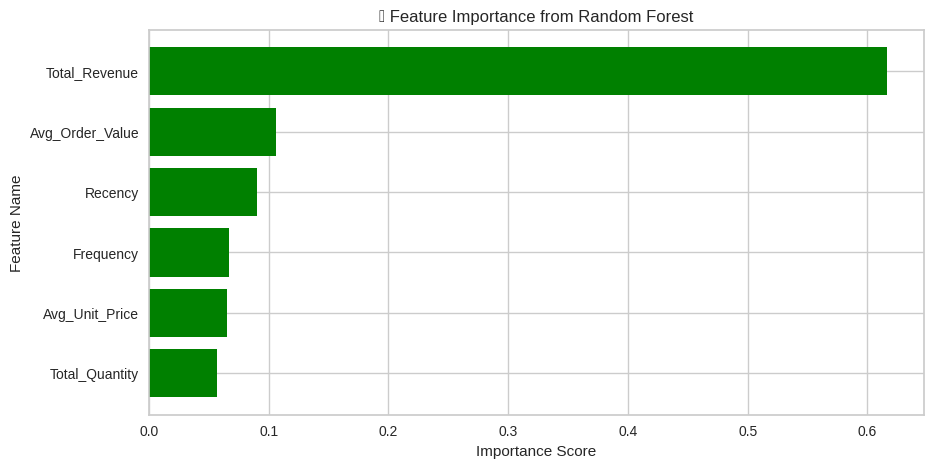

In [ ]:
import matplotlib.pyplot as plt

# Convert X_train back to DataFrame after MinMaxScaler
X_train_df = pd.DataFrame(X_train, columns=X.columns)  # Restore column names

# Get feature importance from Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X_train_df.columns  # Use DataFrame to retain column names

# Create DataFrame for feature importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='green')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("🔹 Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Show most important at the top
plt.show()


In [ ]:
# Compute Mean of Actual Sales
mean_sales = y_test.mean()

# Compute MAE as a percentage of mean sales
mae_percentage = (mae_rf / mean_sales) * 100

print("\n🔹 MAE Evaluation:")
print(f"Mean Future Sales: ${mean_sales:.2f}")
print(f"MAE as % of Mean Sales: {mae_percentage:.2f}%")

# Evaluate whether MAE is acceptable
if mae_percentage < 10:
    print(" MAE is very low. The model performs well.")
elif 10 <= mae_percentage < 20:
    print("MAE is moderate. The model may need some tuning.")
else:
    print(" MAE is high. The model is not making good predictions.")



🔹 MAE Evaluation:
Mean Future Sales: $625.26
MAE as % of Mean Sales: 68.04%
 MAE is high. The model is not making good predictions.
